In [134]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms.functional import pil_to_tensor

from src import ROOT_DIR
from src.datasets import MixedDataset, BildacherBackgroundDataset, OUT_IMAGE_RES
from src.utils import (
    is_bbox_outside_crop,
    get_patch_label,
    plot_tensor,
    unpack_yolo_label,
    yolo_bbox_relative_to_absolute_coords,
    )

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Mixed dataset

In [36]:
dataset = MixedDataset()

In [102]:
image, label, patch = dataset[2]
image.shape, label, patch

(torch.Size([3, 1408, 2048]),
 array([[0.       , 0.9036328, 0.9363663, 0.1510937, 0.1277362],
        [0.       , 0.884458 , 0.5364212, 0.0780175, 0.1018095],
        [0.       , 0.7046386, 0.2098388, 0.0486718, 0.1118827],
        [0.       , 0.6617773, 0.3876007, 0.042207 , 0.0393333],
        [0.       , 0.3827685, 0.3029743, 0.0924121, 0.0902564]]),
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=190x127>)

### Check patches

In [103]:
label, label.shape 

(array([[0.       , 0.9036328, 0.9363663, 0.1510937, 0.1277362],
        [0.       , 0.884458 , 0.5364212, 0.0780175, 0.1018095],
        [0.       , 0.7046386, 0.2098388, 0.0486718, 0.1118827],
        [0.       , 0.6617773, 0.3876007, 0.042207 , 0.0393333],
        [0.       , 0.3827685, 0.3029743, 0.0924121, 0.0902564]]),
 (5, 5))

In [104]:
x, y, w, h = unpack_yolo_label(label[4])
x, y, w, h

(0.3827685, 0.3029743, 0.0924121, 0.0902564)

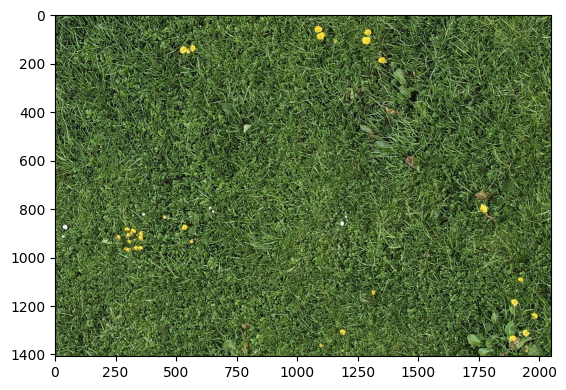

In [105]:
plot_tensor(image)
H = image.shape[1]
W = image.shape[2]

In [106]:
patch_height = round(h * H)
patch_width = round(w * W)
patch_height, patch_width

(127, 189)

In [107]:
x_center = round(x * W)
y_center = round(y * H)
_patch = image[:, y_center - patch_height//2 : y_center + patch_height//2, x_center - patch_width//2 : x_center + patch_width//2]

torch.Size([3, 126, 188])


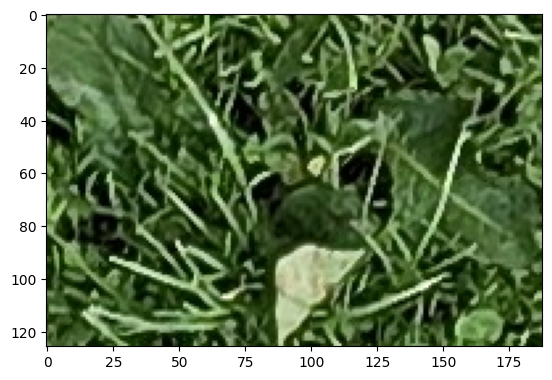

In [108]:
print(_patch.shape)
plot_tensor(_patch)

torch.Size([3, 127, 190])


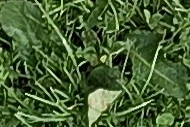

In [109]:
print(pil_to_tensor(patch).shape)
patch

**Patch extracted from labels match! (before doing CenterCrop)**

### Discard labels, patches and images when any part of the BBox is outside CenterCrop

In [112]:
image, label, patch = dataset[1]
label

array([[0.       , 0.603601 , 0.0288241, 0.0702783, 0.0576483],
       [0.       , 0.4438354, 0.569934 , 0.085708 , 0.1343443],
       [0.       , 0.8816699, 0.0546849, 0.1143945, 0.1093699]])

In [132]:
for i in range(len(dataset)):
    image, label, patch = dataset[i]
    
    # Find label of patch by patch height and width
    patch_height, patch_width = pil_to_tensor(patch).shape[1:]

    if label.ndim == 1: # make those with a single bbox 2D so we can do same for loop for all labels
        label = label[np.newaxis, :]

    size_abs_diff = {}
    for i, l in enumerate(label):
        x, y, w, h = unpack_yolo_label(l)
        x, y, w, h = yolo_bbox_relative_to_absolute_coords(x, y, w, h, W, H)
        size_abs_diff[i] = abs(h - patch_height) + abs(w - patch_width)

    j = min(size_abs_diff, key=size_abs_diff.get) 
    label_match = label[j]
    x, y, w, h = unpack_yolo_label(label_match)
    x, y, w, h = yolo_bbox_relative_to_absolute_coords(x, y, w, h, W, H)
    print(h, w)
    print(patch_height, patch_width)    

94 340
94 340
189 176
189 176
127 189
127 190
340 224
340 224
128 79
128 79
378 229
379 229
143 132
144 132
72 55
73 55
201 127
200 126
283 230
282 230
216 308
215 308
127 110
127 110
123 212
124 212
95 129
95 130
347 254
347 254
336 303
336 303
113 180
114 180
156 231
156 231
182 399
182 399
477 476
477 476
165 133
165 133
273 236
274 236
86 62
85 62
194 262
194 262
180 72
180 71
80 92
81 92
399 411
399 411
50 72
50 72
190 370
190 370
340 330
340 330
116 144
115 144
77 229
77 229
365 283
365 283
48 114
48 114
73 133
72 133
223 246
223 246
180 215
181 215
241 132
241 132
472 237
472 237
175 158
175 158
138 93
138 93
199 211
199 211
98 189
98 189
262 55
261 55
309 281
309 281
213 225
213 225
160 91
160 91
56 111
56 111
337 294
337 294
145 211
145 212
106 154
106 154
131 97
131 96
164 85
165 85
165 231
165 231
233 258
234 258
231 268
231 268
235 462
235 462
109 154
109 154
212 119
212 119
189 138
189 139
295 321
295 321
117 203
117 203
150 201
150 200
214 214
214 214
204 82
204 83
73 46


In [34]:
patches_to_discard = []
for i in range(len(dataset)):
    if 
    # Image
    image, label, _ = dataset[i]
    print(label)
    # There are more than one bbox per image, we need to find which one is the one that we see in the patch
    # Finding closest match by patch size:
    
    
    if i == 3:
        break
#     H, W = image.shape[1], image.shape[2]
    
#     ## BBox coordinates
#     #x, y, w, h = unpack_yolo_label(label)
#     print(label)
#     x, w, w, h = unpack_yolo_label(label)
#     print(a)
#     x, y, w, h = yolo_bbox_relative_to_absolute_coords(x, y, w, h, W, H)
#     if is_bbox_outside_crop(x, y, w, h, W, H, OUT_IMAGE_RES):
#         patches_to_discard.append(i)
# patches_to_discard

[0.        0.209082  0.540901  0.1658007 0.0668864]
[[0.        0.603601  0.0288241 0.0702783 0.0576483]
 [0.        0.4438354 0.569934  0.085708  0.1343443]
 [0.        0.8816699 0.0546849 0.1143945 0.1093699]]
[[0.        0.9036328 0.9363663 0.1510937 0.1277362]
 [0.        0.884458  0.5364212 0.0780175 0.1018095]
 [0.        0.7046386 0.2098388 0.0486718 0.1118827]
 [0.        0.6617773 0.3876007 0.042207  0.0393333]
 [0.        0.3827685 0.3029743 0.0924121 0.0902564]]
[[0.        0.3278295 0.0862307 0.1333935 0.148608 ]
 [0.        0.5508178 0.1019084 0.1513134 0.1501025]
 [0.        0.278125  0.9017655 0.1321972 0.1961025]
 [0.        0.7435351 0.7860036 0.1078417 0.2409304]
 [0.        0.6961303 0.9260219 0.0888818 0.1369084]
 [0.        0.8448632 0.8935787 0.1303613 0.2071428]
 [0.        0.6182177 0.451901  0.0997656 0.1413699]
 [0.        0.7232714 0.415619  0.1093359 0.2411575]]


In [ ]:
# Example bounding box coordinates (x, y, height, width)
x_coord, y_coord = 800, 600  # Example center coordinates
bbox_height, bbox_width = 300, 200  # Example height and width of the bounding box

# Check if the bounding box lies outside the CenterCrop(1280)
outside_crop = check_bbox_outside_crop(x_coord, y_coord, bbox_height, bbox_width, crop_size=1280)

if outside_crop:
    print("Bounding box lies partially or fully outside the CenterCrop(1280)")
else:
    print("Bounding box is completely inside the CenterCrop(1280)")
        

## Bildacher backgrounds dataset

torch.Size([3, 1280, 1280])


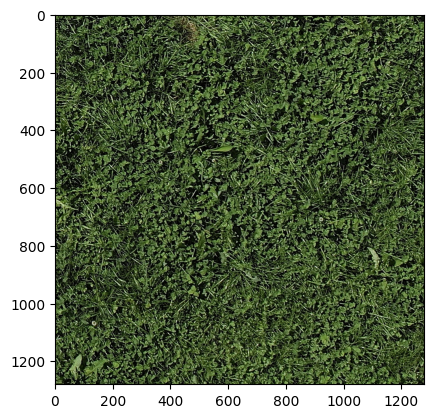

In [273]:
bildacher = BildacherBackgroundDataset()
image = bildacher[0]
print(image.shape)
plot_tensor(image)